In [1]:
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from pyspark.sql.functions import col as column

In [2]:
train_df1=pd.read_csv('/Users/adityavyas/Desktop/Machine Learning and Big Data/Datasets/BigMart Sales/Train.csv')
test_df1=pd.read_csv('/Users/adityavyas/Desktop/Machine Learning and Big Data/Datasets/BigMart Sales/Test.csv')

In [3]:
train_df1.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#We will see how the features are

train_df1.describe()

/Users/adityavyas/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,NaN,0.026989,93.826500,1987.000000,834.247400
50%,NaN,0.053931,143.012800,1999.000000,1794.331000
75%,NaN,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
#We check if there are any null values or not.

print train_df1.isnull().sum()
print '-----------------------'
print test_df1.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
-----------------------
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


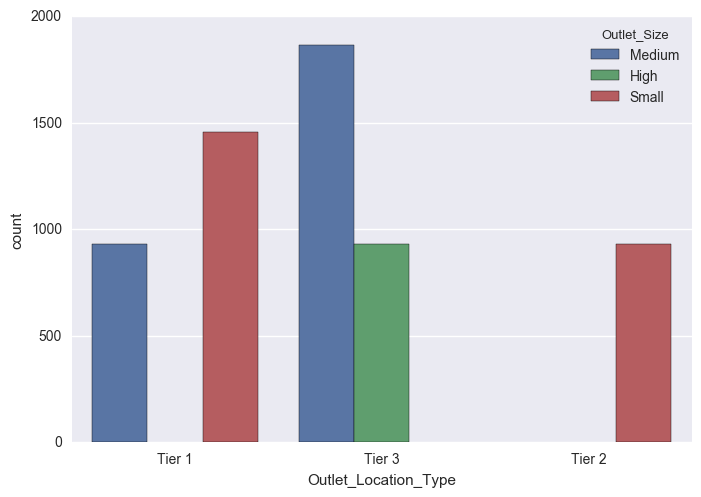

In [6]:
#We plot a graph between Outlet Size and Outlet Location Type

sns.countplot('Outlet_Location_Type',hue='Outlet_Size',data=train_df1)

In [7]:
#Since Tier-2 has only small sizes we will assign Small to all items in Tier2 where values are missing.

def remove_null(x):
    if pd.isnull(x['Outlet_Size']):
        if x['Outlet_Location_Type']=='Tier 2':
            x['Outlet_Size']='Small'
        if x['Outlet_Location_Type']=='Tier 3':
            x['Outlet_Size']='Medium'
        if x['Outlet_Location_Type']=='Tier 1':
            x['Outlet_Size']='Small'
    if pd.isnull(x['Item_Weight']):
        x['Item_Weight']=train_df1['Item_Weight'].mean()
    return x


train_df2=train_df1.apply(lambda x:remove_null(x),1)
test_df2=test_df1.apply(lambda x:remove_null(x),1)

In [8]:
print train_df2.isnull().sum()
print '-----------------------'
print test_df2.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64
-----------------------
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [9]:
#Now we check what each column/feature represents.

train_df2.columns

Index([u'Item_Identifier', u'Item_Weight', u'Item_Fat_Content',
       u'Item_Visibility', u'Item_Type', u'Item_MRP', u'Outlet_Identifier',
       u'Outlet_Establishment_Year', u'Outlet_Size', u'Outlet_Location_Type',
       u'Outlet_Type', u'Item_Outlet_Sales'],
      dtype='object')

In [10]:
for col in train_df2.columns:
    print "Unique values in "+col+" "+str(len(train_df2[col].unique()))+'\n'

Unique values in Item_Identifier 1559

Unique values in Item_Weight 416

Unique values in Item_Fat_Content 5

Unique values in Item_Visibility 7880

Unique values in Item_Type 16

Unique values in Item_MRP 5938

Unique values in Outlet_Identifier 10

Unique values in Outlet_Establishment_Year 9

Unique values in Outlet_Size 3

Unique values in Outlet_Location_Type 3

Unique values in Outlet_Type 4

Unique values in Item_Outlet_Sales 3493



In [11]:
#Item_Identifier

train_df2['Item_Identifier'].head(5)

0    FDA15
1    DRC01
2    FDN15
3    FDX07
4    NCD19
Name: Item_Identifier, dtype: object

In [12]:
#We see that FD,DR and NC stand for Food,Drinks and Non-Consumable. Hence we reduce each identifier to FD,DR or NC

train_df2['Item_Identified_As']=train_df2['Item_Identifier'].apply(lambda x:x[0:2])
train_df2['Item_Identified_As'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identified_As, dtype: int64

In [13]:
test_df2['Item_Identified_As']=test_df2['Item_Identifier'].apply(lambda x:x[0:2])
item_identifier_test=test_df2['Item_Identifier']
test_df2['Item_Identified_As'].value_counts()

FD    4076
NC    1087
DR     518
Name: Item_Identified_As, dtype: int64

In [14]:
train_df2.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identified_As
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,FD


In [15]:
#Item Weight

train_df2['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

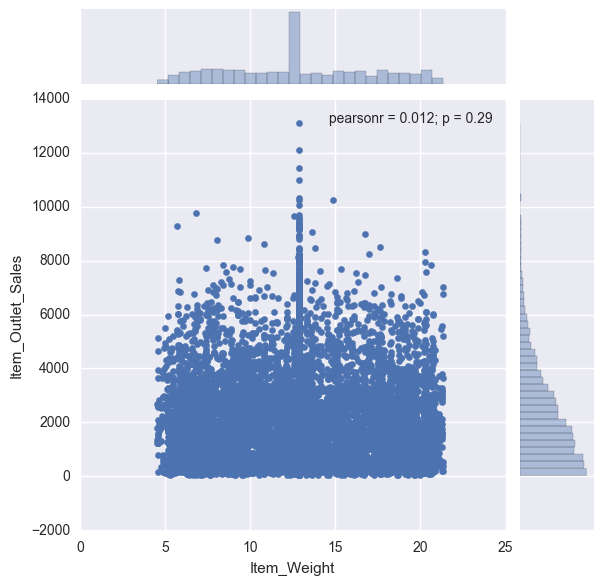

In [16]:
#We are not doing anything with the weight. Obviously Low Fat foods will have lesser weight and vice-versa.If we look 
#at how the weight affects the sales(linearity or not) we can plot the graph

sns.jointplot('Item_Weight','Item_Outlet_Sales',data=train_df2)

In [17]:
#We see that weight has very less linear relationship with the item sales. Now for the Item Fat Content

train_df2['Item_Fat_Content'].describe()

count        8523
unique          5
top       Low Fat
freq         5089
Name: Item_Fat_Content, dtype: object

In [18]:
train_df2['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
train_df2['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [20]:
#We can group low fat and Low Fat as same.Hence we will remove it

train_df2['Item_Fat_Content']=train_df2['Item_Fat_Content'].replace({'Low Fat':'LF','low fat':'LF','reg':'Reg'
                                                                     ,'Regular':'Reg'})
test_df2['Item_Fat_Content']=test_df2['Item_Fat_Content'].replace({'Low Fat':'LF','low fat':'LF','reg':'Reg'
                                                                     ,'Regular':'Reg'})

In [21]:
train_df2['Item_Fat_Content'].value_counts()

LF     5517
Reg    3006
Name: Item_Fat_Content, dtype: int64

In [22]:
#Item Visibility

train_df2['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [23]:
#We see that the minimum value value of the visibility is 0.000. However we will set it to the mean of each product
visibility_avg = train_df2.pivot_table(values='Item_Visibility', index='Item_Identifier')
miss_bool = (train_df2['Item_Visibility'] == 0)

train_df2.loc[miss_bool,'Item_Visibility'] = train_df2.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg[x])

In [24]:
visibility_avg2 = test_df2.pivot_table(values='Item_Visibility', index='Item_Identifier')
miss_bool2 = (test_df2['Item_Visibility'] == 0)

test_df2.loc[miss_bool2,'Item_Visibility'] = test_df2.loc[miss_bool2,'Item_Identifier'].apply(lambda x: visibility_avg2[x])

In [25]:
train_df2['Item_Visibility'].describe()

count    8523.000000
mean        0.069670
std         0.049810
min         0.003575
25%         0.031114
50%         0.056922
75%         0.097160
max         0.328391
Name: Item_Visibility, dtype: float64

In [26]:
train_df2.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identified_As
0,FDA15,9.3,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,FD


In [27]:
#Item_Type

train_df2['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [28]:
train_df2['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

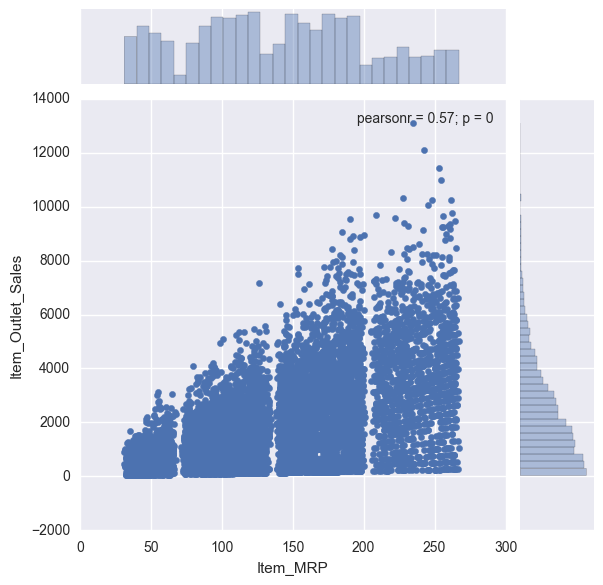

In [29]:
#Item MRP. Item MRP has the highest linear variance with the item sales at each outlets and is thus a very strong 
#feature.

sns.jointplot('Item_MRP','Item_Outlet_Sales',data=train_df2)

In [30]:
#Outlet Identifier 

train_df2['Outlet_Identifier'].describe()

count       8523
unique        10
top       OUT027
freq         935
Name: Outlet_Identifier, dtype: object

In [31]:
print train_df2['Outlet_Identifier'].unique()
print train_df2['Outlet_Identifier'].value_counts()

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


In [32]:
#Outlet Establishment Year
#Obviously outlets which are established before have higher chances of increased sales

train_df2['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [33]:
print train_df2['Outlet_Establishment_Year'].unique()
print train_df2['Outlet_Establishment_Year'].value_counts()

[1999 2009 1998 1987 1985 2002 2007 1997 2004]
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


In [34]:
#We can find out for how many years they have been operating

train_df2['Outlet_Operating_Years']=2013-train_df2['Outlet_Establishment_Year']
test_df2['Outlet_Operating_Years']=2013-test_df2['Outlet_Establishment_Year']

In [35]:
train_df2.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identified_As,Outlet_Operating_Years
0,FDA15,9.3,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,FD,14


In [36]:
#Outlet Size

train_df2['Outlet_Size'].describe()

count      8523
unique        3
top       Small
freq       4243
Name: Outlet_Size, dtype: object

In [37]:
print train_df2['Outlet_Size'].unique()
print train_df2['Outlet_Size'].value_counts()

['Medium' 'High' 'Small']
Small     4243
Medium    3348
High       932
Name: Outlet_Size, dtype: int64


In [38]:
dummies_for=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type',
                'Item_Identified_As']

for col in dummies_for:
    train_df2=train_df2.join(pd.get_dummies(train_df2[col]))
    test_df2=test_df2.join(pd.get_dummies(test_df2[col]))
    

In [39]:
train_df2.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,DR,FD,NC
0,FDA15,9.3,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [40]:
#We can drop the unnecessary columns

train_df3=train_df2.drop(dummies_for+['Item_Identifier','Outlet_Establishment_Year'],1)

item_identifiers_test=test_df2['Item_Identifier']
outlet_identifiers_test=test_df2['Outlet_Identifier']

test_df3=test_df2.drop(dummies_for+['Item_Identifier','Outlet_Establishment_Year'],1)

In [41]:
train_df3.head(1)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Operating_Years,LF,Reg,Baking Goods,Breads,Breakfast,...,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,DR,FD,NC
0,9.3,0.016047,249.8092,3735.138,14,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [43]:
from sklearn.preprocessing import StandardScaler
from math import sqrt

scaler=StandardScaler(with_mean=True,with_std=True)
X_TRAIN_SCALED,Y_TRAIN=scaler.fit_transform(train_df3.drop('Item_Outlet_Sales',1)),train_df3['Item_Outlet_Sales']
X_TEST_SCALED=scaler.fit_transform(test_df3)

In [46]:
from sklearn import linear_model,cross_validation,ensemble,metrics
from math import sqrt


X_TRAIN,Y_TRAIN=train_df3.drop('Item_Outlet_Sales',1),train_df3['Item_Outlet_Sales']
X_TEST=test_df3

In [2272]:
#Split training data into training and validation sets

train1,val1=cross_validation.train_test_split(train_df3,train_size=0.8)
x_train,y_train=train1.drop('Item_Outlet_Sales',1),train1['Item_Outlet_Sales']
x_val,y_val=val1.drop('Item_Outlet_Sales',1),val1['Item_Outlet_Sales']

In [2273]:
#Simple Linear Regression

linreg=linear_model.LinearRegression(fit_intercept=True,normalize=False)
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_val)
rmse1=sqrt(metrics.mean_squared_error(y_val,y_pred))
rmse1

1145.1572694564015

In [2274]:
#Predict on the final train data

linreg.fit(X_TRAIN,Y_TRAIN)
Y_PRED1=linreg.predict(X_TEST)
linreg.score(X_TRAIN,Y_TRAIN)

0.56372823328875632

In [2275]:
#Ridge Regression Model

ridge=linear_model.Ridge(alpha=0.10)
ridge.fit(x_train,y_train)
y_pred2=ridge.predict(x_val)
rmse2=sqrt(metrics.mean_squared_error(y_val,y_pred2))
rmse2

1145.151140400316

In [2276]:
#Predict on the final train data

ridge.fit(X_TRAIN,Y_TRAIN)
Y_PRED2=ridge.predict(X_TEST)
ridge.score(X_TRAIN,Y_TRAIN)

0.56372823179477227

In [2277]:
y_train_forest=np.asarray(y_train, dtype="|S6")
y_val_forest=np.asarray(y_val, dtype="|S6")

Y_TRAIN_FOREST=np.asarray(Y_TRAIN, dtype="|S6")

In [47]:
#Random Forest Model

rforest=ensemble.RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
gboost=ensemble.GradientBoostingRegressor(n_estimators=58,max_depth=3)
#rforest.fit(x_train,y_train)
#y_pred3=rforest.predict(x_val)

In [48]:
gboost.fit(X_TRAIN_SCALED,Y_TRAIN)
rforest.fit(X_TRAIN_SCALED,Y_TRAIN)
Y_PRED3=gboost.predict(X_TEST_SCALED)
Y_PRED4=rforest.predict(X_TEST_SCALED)

In [49]:
print (Y_PRED3)
print Y_PRED4

[ 1568.65034638  1375.30156335   625.39461688 ...,  1830.8798784
  3559.3126818   1309.68502332]
[ 1649.08020051  1366.12996503   572.32786059 ...,  1923.30703216
  3646.73810369  1287.47311917]


In [2283]:
gboost.feature_importances_

array([  4.26075045e-02,   9.24422692e-02,   4.92341055e-01,
         2.16457790e-02,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   9.68103959e-04,   4.96763819e-03,
         4.04260316e-04,   0.00000000e+00,   0.00000000e+00,
         1.45994456e-02,   0.00000000e+00,   0.00000000e+00,
         3.85911052e-03,   6.46914891e-05,   0.00000000e+00,
         2.61112020e-03,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.12434045e-03,   8.99337360e-04,
         3.99591960e-03,   1.49246110e-04,   0.00000000e+00,
         5.34867840e-02,   9.02329210e-03,   2.09273342e-02,
         0.00000000e+00,   2.05860451e-03,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         5.54376999e-03,   0.00000000e+00,   1.36594472e-01,
         4.05562224e-02,   1.42840746e-03,   4.71378325e-02,
         0.00000000e+00,   5.63458736e-04,   0.00000000e+00])

In [50]:
test_df4=test_df3
test_df4['Item_Outlet_Sales']=Y_PRED4
test_df4['Item_Identifier']=item_identifiers_test
test_df4['Outlet_Identifier']=outlet_identifiers_test

In [51]:
test_df4[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']].to_csv('/Users/adityavyas/Desktop/sales_.csv')